In [105]:
# Download helper functions script
!wget https://raw.githubusercontent.com/Hirann97/tensorflow_deeplearning/main/deep%20learning%20-%20my%20learning%20pathways/helper_function.py

--2022-12-13 18:33:54--  https://raw.githubusercontent.com/Hirann97/tensorflow_deeplearning/main/deep%20learning%20-%20my%20learning%20pathways/helper_function.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10558 (10K) [text/plain]
Saving to: ‘helper_function.py’

helper_function.py  100%[===================>]  10.31K  --.-KB/s    in 0s      

2022-12-13 18:33:54 (49.7 MB/s) - ‘helper_function.py’ saved [10558/10558]



In [3]:
# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [4]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2022-12-13 17:53:13--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 74.125.203.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2022-12-13 17:53:13 (96.7 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [5]:
# Turn .csv files into pandas DataFrame's
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [7]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [8]:
train_df_shuffled.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [9]:
# How many samples total?
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")

Total training samples: 7613
Total test samples: 3263
Total samples: 10876


In [10]:
import random
random_index=random.randint(0,len(train_df)-5)

for row in train_df_shuffled[['text','target']][random_index:random_index+10].itertuples():
  _,text,target=row
  print(f'target:{target}','(real disater)' if target > 0 else '(not a distater)')
  print(f"Text:\n{text}\n")
  print("---\n")

target:0 (not a distater)
Text:
@LeMaireLee @danharmon People Near Meltdown Comics Who Have Free Time to Wait in Line on Sunday Nights are not a representative sample. #140

---

target:0 (not a distater)
Text:
Currently Blasting #Benediction - #SanelessTheory -on Metal Devastation Radio-  http://t.co/siGeeQ42cZ

---

target:0 (not a distater)
Text:
sleeping with sirens vai vir pra sp

---

target:1 (real disater)
Text:
The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/6AcSWzo7cw

---

target:0 (not a distater)
Text:
*Jumps off of a cliff while drinking tea*

This is how British people fall off cliffs.

---

target:1 (real disater)
Text:
The Latest: More homes razed by Northern California wildfire - http://t.co/3tnuACIV3c http://t.co/SAkORGdqUL

---

target:1 (real disater)
Text:
'Suicide bombing at [location named]...' #premonitions http://t.co/iIkSsJGBDn

---

target:0 (not a distater)
Text:
New Women Handbag Faux Leather Ladies Shoulder Tote Cross B

## split data into train and validation sets

In [11]:
from sklearn.model_selection import train_test_split
train_sentences,val_sentences,train_labels,val_labels=train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                       train_df_shuffled['target'].to_numpy(),
                                                                       test_size=0.1,
                                                                       random_state=42)

In [12]:
len(train_sentences),len(val_sentences),len(train_labels),len(val_labels)

(6851, 762, 6851, 762)

In [13]:
# View the first 10 training sentences and their labels
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

text_vectorizer=TextVectorization(max_tokens=None,
                                 standardize='lower_and_strip_punctuation',
                                 split='whitespace',
                                 ngrams=None,
                                 output_mode='int',
                                 output_sequence_length=None)

In [15]:
round(sum([len(i.split()) for i in train_sentences])/(len(train_sentences)))

15

In [16]:
max_vocab_length=10000
max_length=15
text_vectorizer=TextVectorization(max_tokens=max_vocab_length,
                                  output_mode='int',
                                  output_sequence_length=max_length)

In [17]:
text_vectorizer.adapt(train_sentences)

In [18]:
# Create sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [19]:
random_sentence= random.choice(train_sentences)
print(f'ranom sentence:\n{random_sentence}\n \n text_vectorized:')
text_vectorizer([random_sentence])

ranom sentence:
Explosion at chemical site leads to building collapse near Krefeld Germany. Emergency crews on scene; avoid the area. #iJETalerts
 
 text_vectorized:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 303,   17,  554,  615, 1647,    5,  630,  155,  217,    1, 2448,
          73,  689,   11,  991]])>

In [20]:
# we can check the unique tokens in our vocabulary using the get_vocabulary() method.
words_in_vocab=text_vectorizer.get_vocabulary()
top_5_words= words_in_vocab[:5]
bottom_5_words=words_in_vocab[-5:]
print(f'number of words in vocab:{len(words_in_vocab)}')
print('top 5 wors are:',top_5_words)
print('bottom 5 least used words are:',bottom_5_words)

number of words in vocab:10000
top 5 wors are: ['', '[UNK]', 'the', 'a', 'in']
bottom 5 least used words are: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


In [21]:
# embedding layers
tf.random.set_seed(42)
from tensorflow.keras import layers
embedding=layers.Embedding(input_dim=max_vocab_length,
                           output_dim=128,
                           embeddings_initializer='uniform',
                           input_length=max_length,
                           name='embeding_1')

In [22]:
embeded_sentence=embedding(text_vectorizer([random_sentence]))

In [23]:
print(f'random_sentence:{random_sentence}\n \n embedded sentence:{embeded_sentence}')

random_sentence:Explosion at chemical site leads to building collapse near Krefeld Germany. Emergency crews on scene; avoid the area. #iJETalerts
 
 embedded sentence:[[[-0.01731665 -0.01914731 -0.03701182 ...  0.04430815  0.03961322
    0.03410899]
  [-0.00224935  0.01572106 -0.04972882 ... -0.00392847  0.030908
   -0.04232835]
  [-0.03470099 -0.01339444 -0.03590978 ... -0.00431316 -0.0229174
    0.04363525]
  ...
  [ 0.03812473 -0.00505141 -0.04772571 ... -0.00854427  0.00714902
    0.00423177]
  [-0.02399485  0.01468222  0.00041829 ...  0.02498427 -0.02674054
   -0.00808267]
  [ 0.01698576 -0.02924111  0.00267718 ...  0.01515779 -0.04603399
   -0.01447653]]]


In [24]:
# Check out a single token's embedding
embeded_sentence[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.01731665, -0.01914731, -0.03701182,  0.04692333, -0.04600943,
        0.02011082,  0.02282305,  0.0210839 ,  0.0448858 ,  0.04630243,
       -0.02467648, -0.03439407, -0.03865367, -0.01273098, -0.00377733,
       -0.02775042, -0.04116621,  0.04320257, -0.03333688, -0.00708691,
        0.03842677,  0.03069626, -0.01472412,  0.04934472, -0.02245765,
       -0.03551666, -0.0141372 , -0.02507337, -0.04586425,  0.01319603,
       -0.04798172,  0.03327923,  0.03023256,  0.01081339,  0.03727286,
        0.0461774 , -0.02824935,  0.04622345, -0.01001934,  0.03275063,
        0.0007506 ,  0.0122233 ,  0.01293233, -0.0375414 , -0.04603741,
        0.01275522, -0.00820018, -0.01078657,  0.01004832,  0.04654567,
       -0.04575076, -0.03158391,  0.0170658 , -0.00828099, -0.00920174,
       -0.03129961, -0.04896684, -0.00071567,  0.03751871,  0.02302564,
        0.04614086, -0.01010885,  0.04225126,  0.00400752,  0.01104734,
       -0.038057

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [26]:
model_0=Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('clf',MultinomialNB())
])

In [27]:
model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [28]:
baseline_score=model_0.score(val_sentences,val_labels)

In [29]:
print(f'our baseline model achives a score of:{baseline_score*100:.2f}%')

our baseline model achives a score of:79.27%


In [30]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [31]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support

def calculate_results(y_true,y_pred):
  model_accuracy=accuracy_score(y_true,y_pred)*100
  model_precision,model_recall,model_f1,_=precision_recall_fscore_support(y_true,y_pred,average='weighted')
  model_results={'accuracy': model_accuracy,
                 'precison': model_precision,
                 'recall': model_recall,
                 'f1 score':model_f1}

  return model_results

In [32]:
baseline_results=calculate_results(y_true=val_labels,y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precison': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1 score': 0.7862189758049549}

In [33]:
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [34]:
inputs=layers.Input(shape=(1,),dtype='string')
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.GlobalAveragePooling1D()(x)
outputs=layers.Dense(1,activation='sigmoid',name='output_layer')(x)
model_1=tf.keras.Model(inputs,outputs,name='model_1_dense')

In [35]:
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [36]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embeding_1 (Embedding)      (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [37]:
model_1.fit(train_sentences,
            train_labels,
            epochs=5,
            validation_data=(val_sentences,val_labels),
            callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20221213-175315
Epoch 1/5
215/215 [==============================] - 4s 16ms/step - loss: 0.6094 - accuracy: 0.6916 - val_loss: 0.5357 - val_accuracy: 0.7572
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.4410 - accuracy: 0.8189 - val_loss: 0.4691 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3463 - accuracy: 0.8605 - val_loss: 0.4590 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2848 - accuracy: 0.8923 - val_loss: 0.4641 - val_accuracy: 0.7927
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.2380 - accuracy: 0.9118 - val_loss: 0.4767 - val_accuracy: 0.7874


In [38]:
model_1.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 2ms/step - loss: 0.4767 - accuracy: 0.7874


[0.4766846001148224, 0.787401556968689]

In [39]:
# Make predictions (these come back in the form of probabilities)
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10] # only print out the first 10 prediction probabilities

24/24 [==============================] - 0s 2ms/step


array([[0.40488207],
       [0.74433124],
       [0.997895  ],
       [0.1089    ],
       [0.1114353 ],
       [0.93556094],
       [0.9134594 ],
       [0.99253446],
       [0.9715681 ],
       [0.2657034 ]], dtype=float32)

In [40]:
# Turn prediction probabilities into single-dimension tensor of floats
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs)) # squeeze removes single dimensions
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [41]:
model_1_results=calculate_results(y_true=val_labels,
                                  y_pred=model_1_preds)

model_1_results

{'accuracy': 78.74015748031496,
 'precison': 0.7914920592553047,
 'recall': 0.7874015748031497,
 'f1 score': 0.7846966492209201}

In [42]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embeding_1 (Embedding)      (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

lstm

In [43]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding=layers.Embedding(input_dim=max_vocab_length,
                                   output_dim=128,
                                   embeddings_initializer='uniform',
                                   input_length=max_length,
                                   name='embedding_2')

inputs=layers.Input(shape=(1,),dtype='string')
x=text_vectorizer(inputs)
x=model_2_embedding(x)
print(x.shape)
x=layers.LSTM(64,return_sequences=True)(x)
x=layers.LSTM(64)(x)
print(x.shape)
x=layers.Dense(64,activation='relu')(x)

outputs=layers.Dense(1,activation='sigmoid')(x)

model_2=tf.keras.Model(inputs,outputs,name='model_2_lstm')



(None, 15, 128)
(None, 64)


In [44]:
# Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [45]:
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20221213-175333
Epoch 1/5
215/215 [==============================] - 15s 51ms/step - loss: 0.5105 - accuracy: 0.7475 - val_loss: 0.4579 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 8s 36ms/step - loss: 0.3205 - accuracy: 0.8701 - val_loss: 0.4992 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 8s 36ms/step - loss: 0.2233 - accuracy: 0.9145 - val_loss: 0.5533 - val_accuracy: 0.7559
Epoch 4/5
215/215 [==============================] - 8s 35ms/step - loss: 0.1621 - accuracy: 0.9432 - val_loss: 0.6374 - val_accuracy: 0.7664
Epoch 5/5
215/215 [==============================] - 8s 35ms/step - loss: 0.1118 - accuracy: 0.9585 - val_loss: 0.8779 - val_accuracy: 0.7638


In [46]:
# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10] # view the first 10

24/24 [==============================] - 1s 7ms/step


((762, 1), array([[1.7079514e-02],
        [6.6736019e-01],
        [9.9978411e-01],
        [3.3760622e-02],
        [8.3615410e-04],
        [9.9988747e-01],
        [8.7640959e-01],
        [9.9992561e-01],
        [9.9987233e-01],
        [1.9446404e-01]], dtype=float32))

In [47]:
# Round out predictions and reduce to 1-dimensional array
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [48]:
# Calculate LSTM model results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 76.37795275590551,
 'precison': 0.766310461192351,
 'recall': 0.7637795275590551,
 'f1 score': 0.7610762606610089}

In [49]:
model_1_results

{'accuracy': 78.74015748031496,
 'precison': 0.7914920592553047,
 'recall': 0.7874015748031497,
 'f1 score': 0.7846966492209201}

### GRU MODEL

In [50]:
tf.random.set_seed(42)
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x=model_3_embedding(x)
print(x.shape)
x=layers.GRU(64,return_sequences=True)(x)
x=layers.GRU(62)(x)
print(x.shape)
x=layers.Dense(64,activation='relu')(x)

outputs=layers.Dense(1,activation='sigmoid')(x)

model_3=tf.keras.Model(inputs,outputs,name='model_3_lstm')



(None, 15, 128)
(None, 62)


In [51]:
# Compile GRU model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [52]:
model_3.summary()

Model: "model_3_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 15, 64)            37248     
                                                                 
 gru_1 (GRU)                 (None, 62)                23808     
                                                                 
 dense_2 (Dense)             (None, 64)                4032      
                                                      

In [53]:
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20221213-175420
Epoch 1/5
215/215 [==============================] - 12s 39ms/step - loss: 0.5227 - accuracy: 0.7342 - val_loss: 0.4486 - val_accuracy: 0.7874
Epoch 2/5
215/215 [==============================] - 7s 34ms/step - loss: 0.3255 - accuracy: 0.8672 - val_loss: 0.4964 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 7s 34ms/step - loss: 0.2254 - accuracy: 0.9172 - val_loss: 0.5424 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 7s 35ms/step - loss: 0.1642 - accuracy: 0.9428 - val_loss: 0.6391 - val_accuracy: 0.7690
Epoch 5/5
215/215 [==============================] - 7s 34ms/step - loss: 0.1227 - accuracy: 0.9591 - val_loss: 0.6099 - val_accuracy: 0.7717


In [54]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

24/24 [==============================] - 1s 6ms/step


((762, 1), array([[0.13713403],
        [0.78515404],
        [0.9963305 ],
        [0.15900166],
        [0.01251552],
        [0.9933891 ],
        [0.7235822 ],
        [0.9983667 ],
        [0.9976227 ],
        [0.34323928]], dtype=float32))

In [55]:
model_3_preds=tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [56]:

# Calcuate model_3 results
model_3_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 77.16535433070865,
 'precison': 0.7728196127186888,
 'recall': 0.7716535433070866,
 'f1 score': 0.7698331286570831}

In [57]:
baseline_results

{'accuracy': 79.26509186351706,
 'precison': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1 score': 0.7862189758049549}

### bidirectional Rnn model

In [59]:
tf.random.set_seed(42)
model_4_embedding=layers.Embedding(input_dim=max_vocab_length,
                                   output_dim=128,
                                   embeddings_initializer='uniform',
                                   input_length=max_length,
                                   name='embedding_4')

In [60]:
inputs=layers.Input(shape=(1,),dtype='string')
x=text_vectorizer(inputs)
x=model_4_embedding(x)
print(x.shape)
x=layers.Bidirectional(layers.LSTM(64,return_sequences=True))(x)
x=layers.Bidirectional(layers.LSTM(64))(x)
x=layers.Dense(64,activation='relu')(x)
outputs=layers.Dense(1,activation='sigmoid')(x)
print(x.shape)

model_4=tf.keras.Model(inputs,outputs,name='bidirectional')

(None, 15, 128)
(None, 64)


In [61]:
# Compile
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [62]:
# Fit the model (takes longer because of the bidirectional layers)
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20221213-175504
Epoch 1/5
215/215 [==============================] - 21s 65ms/step - loss: 0.5091 - accuracy: 0.7519 - val_loss: 0.4549 - val_accuracy: 0.7861
Epoch 2/5
215/215 [==============================] - 12s 56ms/step - loss: 0.3124 - accuracy: 0.8762 - val_loss: 0.5288 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 12s 56ms/step - loss: 0.2060 - accuracy: 0.9202 - val_loss: 0.5832 - val_accuracy: 0.7546
Epoch 4/5
215/215 [==============================] - 12s 56ms/step - loss: 0.1359 - accuracy: 0.9548 - val_loss: 0.7044 - val_accuracy: 0.7651
Epoch 5/5
215/215 [==============================] - 12s 55ms/step - loss: 0.0997 - accuracy: 0.9675 - val_loss: 0.7093 - val_accuracy: 0.7651


In [63]:
# Make predictions with bidirectional RNN on the validation data
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 2s 11ms/step


array([[0.00522993],
       [0.75965166],
       [0.9952413 ],
       [0.0810165 ],
       [0.0106603 ],
       [0.99672896],
       [0.9201702 ],
       [0.99840754],
       [0.9973049 ],
       [0.10139247]], dtype=float32)

In [64]:
# Convert prediction probabilities to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [65]:
# Calculate bidirectional RNN model results
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': 76.50918635170603,
 'precison': 0.7724180378580732,
 'recall': 0.7650918635170604,
 'f1 score': 0.760474590084035}

### CONV MODEL

In [66]:
embedding_test=embedding(text_vectorizer(['this is a test sentences']))
conv_1d=layers.Conv1D(filters=32,kernel_size=5,activation='relu',padding='same')
conv_1d_test=conv_1d(embedding_test)
maxpool=layers.GlobalMaxPool1D()
maxpool_output=maxpool(conv_1d_test)
embedding_test.shape,conv_1d_test.shape,maxpool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 15, 32]), TensorShape([1, 32]))

In [67]:
# See the outputs of each layer
embedding_test[:1], conv_1d_test[:1], maxpool_output[:1]

(<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
 array([[[ 0.02534915, -0.03109057,  0.00285617, ..., -0.00783164,
          -0.02685577, -0.04434134],
         [-0.06586258,  0.09451497, -0.01477604, ..., -0.00657783,
          -0.0423879 ,  0.07777894],
         [-0.04803651, -0.00709754, -0.02330892, ..., -0.01807334,
           0.02351035,  0.02676385],
         ...,
         [ 0.00073163,  0.01504796, -0.03425452, ..., -0.04403543,
          -0.01042278,  0.01876437],
         [ 0.00073163,  0.01504796, -0.03425452, ..., -0.04403543,
          -0.01042278,  0.01876437],
         [ 0.00073163,  0.01504796, -0.03425452, ..., -0.04403543,
          -0.01042278,  0.01876437]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 15, 32), dtype=float32, numpy=
 array([[[0.        , 0.        , 0.02097327, 0.02020415, 0.03417523,
          0.        , 0.02581734, 0.        , 0.        , 0.02777118,
          0.        , 0.05763517, 0.07204794, 0.06357766, 0.        ,
          0.00743913, 0.

In [68]:
tf.random.set_seed(42)
model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_5")

# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu",padding='same')(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# Compile Conv1D model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [69]:
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 1)              

In [70]:
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20221213-175616
Epoch 1/5
215/215 [==============================] - 5s 20ms/step - loss: 0.5640 - accuracy: 0.7145 - val_loss: 0.4689 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 4s 19ms/step - loss: 0.3348 - accuracy: 0.8643 - val_loss: 0.4712 - val_accuracy: 0.7874
Epoch 3/5
215/215 [==============================] - 4s 18ms/step - loss: 0.2051 - accuracy: 0.9223 - val_loss: 0.5346 - val_accuracy: 0.7756
Epoch 4/5
215/215 [==============================] - 4s 19ms/step - loss: 0.1295 - accuracy: 0.9584 - val_loss: 0.6052 - val_accuracy: 0.7874
Epoch 5/5
215/215 [==============================] - 4s 19ms/step - loss: 0.0900 - accuracy: 0.9695 - val_loss: 0.6716 - val_accuracy: 0.7900


In [71]:
# Make predictions with model_5
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[0.301082  ],
       [0.79688245],
       [0.99853367],
       [0.09247195],
       [0.00223802],
       [0.9415327 ],
       [0.9618369 ],
       [0.9985428 ],
       [0.9971144 ],
       [0.44734806]], dtype=float32)

In [72]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [73]:
# Calculate model_5 evaluation metrics 
model_5_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 79.00262467191601,
 'precison': 0.7927643927204078,
 'recall': 0.7900262467191601,
 'f1 score': 0.7878790789916538}

In [74]:
baseline_results

{'accuracy': 79.26509186351706,
 'precison': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1 score': 0.7862189758049549}

### Pre-trained sentance encoder

In [75]:
import tensorflow_hub as hub
sentence_ecoder=hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                         input_shape=[],
                         dtype=tf.string,
                         trainable=False,
                         name='use')


In [76]:
model_6=tf.keras.Sequential([
    sentence_ecoder,
    layers.Dense(64,activation='relu'),
    layers.Dense(1,activation='sigmoid'),  
],name='model_6_use')
# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()


Model: "model_6_use"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 use (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [77]:

# Train a classifier on top of pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20221213-175716
Epoch 1/5
215/215 [==============================] - 6s 14ms/step - loss: 0.5008 - accuracy: 0.7892 - val_loss: 0.4478 - val_accuracy: 0.7966
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4144 - accuracy: 0.8133 - val_loss: 0.4369 - val_accuracy: 0.8058
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3998 - accuracy: 0.8212 - val_loss: 0.4329 - val_accuracy: 0.8110
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3925 - accuracy: 0.8266 - val_loss: 0.4288 - val_accuracy: 0.8110
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3860 - accuracy: 0.8276 - val_loss: 0.4309 - val_accuracy: 0.8123


In [78]:
model_6_pred_probs=model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 10ms/step


array([[0.14443198],
       [0.7271504 ],
       [0.9856655 ],
       [0.1974092 ],
       [0.73417026],
       [0.6859664 ],
       [0.9808888 ],
       [0.9741102 ],
       [0.91573215],
       [0.08070084]], dtype=float32)

In [79]:
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [80]:
model_6_results=calculate_results(y_true=val_labels,
                                  y_pred=model_6_preds)
model_6_results

{'accuracy': 81.23359580052494,
 'precison': 0.8148798668657973,
 'recall': 0.8123359580052494,
 'f1 score': 0.810686575717776}

In [81]:
baseline_results

{'accuracy': 79.26509186351706,
 'precison': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1 score': 0.7862189758049549}

In [82]:
import numpy as np

#with 105 of the data 
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)


In [83]:
print(len(train_sentences))
print(len(train_sentences_10_percent))


6851
686


In [84]:
import pandas as pd
pd.Series(train_labels_10_percent).value_counts()

0    415
1    271
dtype: int64

In [85]:
model_7=tf.keras.models.clone_model(model_6)
# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary (will be same as model_6)
model_7.summary()


Model: "model_6_use"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 use (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [86]:

# Fit the model to 10% of the training data
model_7_history = model_7.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder/20221213-175745
Epoch 1/5
22/22 [==============================] - 4s 48ms/step - loss: 0.6716 - accuracy: 0.6574 - val_loss: 0.6526 - val_accuracy: 0.6903
Epoch 2/5
22/22 [==============================] - 1s 27ms/step - loss: 0.5972 - accuracy: 0.8032 - val_loss: 0.5944 - val_accuracy: 0.7362
Epoch 3/5
22/22 [==============================] - 1s 24ms/step - loss: 0.5178 - accuracy: 0.8149 - val_loss: 0.5398 - val_accuracy: 0.7625
Epoch 4/5
22/22 [==============================] - 1s 24ms/step - loss: 0.4526 - accuracy: 0.8265 - val_loss: 0.5084 - val_accuracy: 0.7677
Epoch 5/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4094 - accuracy: 0.8382 - val_loss: 0.4915 - val_accuracy: 0.7703


In [87]:

# Make predictions with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]


24/24 [==============================] - 1s 11ms/step


array([[0.24043253],
       [0.7683783 ],
       [0.9013718 ],
       [0.2906796 ],
       [0.57149976],
       [0.8356513 ],
       [0.8062942 ],
       [0.83358157],
       [0.85545665],
       [0.11749935]], dtype=float32)

In [88]:

# Convert prediction probabilities to labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [89]:

# Calculate model results
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results


{'accuracy': 77.03412073490814,
 'precison': 0.7755630249535594,
 'recall': 0.7703412073490814,
 'f1 score': 0.7667059443150692}

### **comparing** the performance of each of our tested models

In [90]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results


,accuracy,precison,recall,f1 score
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,78.740157,0.791492,0.787402,0.784697
lstm,76.377953,0.766310,0.763780,0.761076
gru,77.165354,0.772820,0.771654,0.769833
bidirectional,76.509186,0.772418,0.765092,0.760475
conv1d,79.002625,0.792764,0.790026,0.787879
tf_hub_sentence_encoder,81.233596,0.814880,0.812336,0.810687
tf_hub_10_percent_data,77.034121,0.775563,0.770341,0.766706


In [92]:
all_model_results["accuracy"] = all_model_results["accuracy"]/100

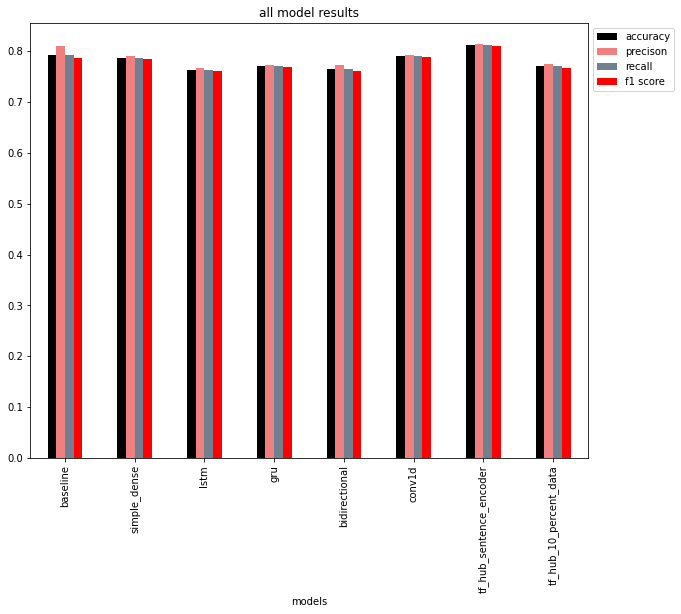

In [101]:
all_model_results.plot(kind='bar',xlabel='models',title='all model results',figsize=(10,8),color=['black','lightcoral','slategray','red']).legend(bbox_to_anchor=(1.0, 1.0));

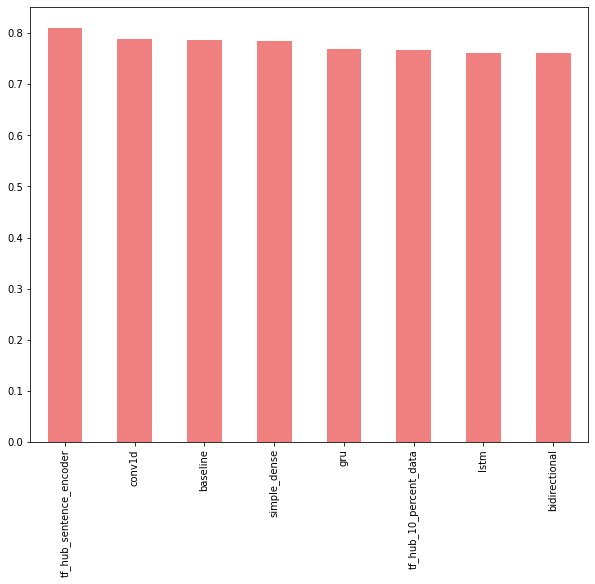

In [98]:

# Sort model results by f1-score
all_model_results.sort_values("f1 score", ascending=False)["f1 score"].plot(kind="bar", figsize=(10, 8),color='lightcoral');

### saving the best model

In [102]:
model_6.save("model_6.h5")

In [103]:

# Load model with custom Hub Layer (required with HDF5 format)
loaded_model_6 = tf.keras.models.load_model("model_6.h5", 
                                            custom_objects={"KerasLayer": hub.KerasLayer})

In [104]:

# How does our loaded model perform?
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 12ms/step - loss: 0.4309 - accuracy: 0.8123


[0.43088313937187195, 0.8123359680175781]